In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import io

**Data Cleaning and Preprocessing**

In [2]:
df = pd.read_csv('LungDataSet.csv')


In [3]:
df.drop('Patient Id', axis = 1, inplace = True)
df.tail(5)

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
999,47,1,6,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


In [4]:
df.loc[2]

Age                        35
Gender                      1
AirPollution                4
Alcoholuse                  5
DustAllergy                 6
OccuPationalHazards         5
GeneticRisk                 5
chronicLungDisease          4
BalancedDiet                6
Obesity                     7
Smoking                     2
PassiveSmoker               3
ChestPain                   4
CoughingofBlood             8
Fatigue                     8
WeightLoss                  7
ShortnessofBreath           9
Wheezing                    2
SwallowingDifficulty        1
ClubbingofFingerNails       4
FrequentCold                6
DryCough                    7
Snoring                     2
Level                    High
Name: 2, dtype: object

In [5]:
df.shape

(1000, 24)

In [6]:
df.columns

Index(['Age', 'Gender', 'AirPollution', 'Alcoholuse', 'DustAllergy',
       'OccuPationalHazards', 'GeneticRisk', 'chronicLungDisease',
       'BalancedDiet', 'Obesity', 'Smoking', 'PassiveSmoker', 'ChestPain',
       'CoughingofBlood', 'Fatigue', 'WeightLoss', 'ShortnessofBreath',
       'Wheezing', 'SwallowingDifficulty', 'ClubbingofFingerNails',
       'FrequentCold', 'DryCough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
df.isna().sum()  #no null values

Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

In [8]:
df['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Level'>

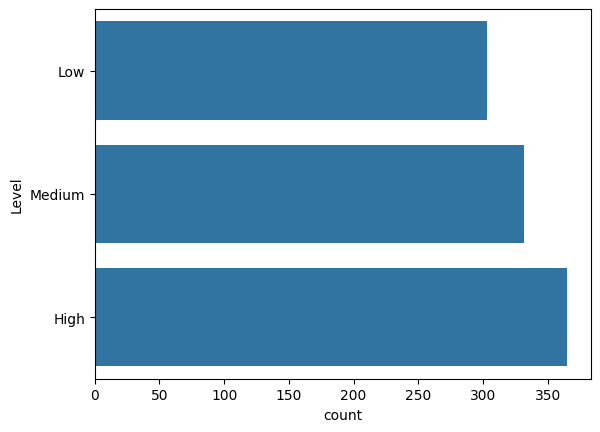

In [9]:
sns.countplot(df['Level'])

In [10]:
df.dtypes

Age                       int64
Gender                    int64
AirPollution              int64
Alcoholuse                int64
DustAllergy               int64
OccuPationalHazards       int64
GeneticRisk               int64
chronicLungDisease        int64
BalancedDiet              int64
Obesity                   int64
Smoking                   int64
PassiveSmoker             int64
ChestPain                 int64
CoughingofBlood           int64
Fatigue                   int64
WeightLoss                int64
ShortnessofBreath         int64
Wheezing                  int64
SwallowingDifficulty      int64
ClubbingofFingerNails     int64
FrequentCold              int64
DryCough                  int64
Snoring                   int64
Level                    object
dtype: object

**Spliting Dataset into training(75%) and testing(25%) datasets**

In [11]:
features = ['Age', 'Gender', 'AirPollution', 'Alcoholuse',
       'DustAllergy', 'OccuPationalHazards', 'GeneticRisk',
       'chronicLungDisease', 'BalancedDiet', 'Obesity', 'Smoking',
       'PassiveSmoker', 'ChestPain', 'CoughingofBlood', 'Fatigue',
       'WeightLoss', 'ShortnessofBreath', 'Wheezing', 'SwallowingDifficulty',
       'ClubbingofFingerNails', 'FrequentCold', 'DryCough', 'Snoring']
#print(features)

In [12]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.80)

In [14]:
X_train = train[features]
Y_train = train['Level']

X_test = test[features]
Y_test = test['Level']

**Model Creation**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [16]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [17]:
model.score(X_test, Y_test)

1.0

In [18]:
Y_pred = model.predict(X_test)
print(Y_pred)

['High' 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'High' 'High' 'High' 'Low'
 'High' 'Medium' 'High' 'Low' 'Medium' 'High' 'High' 'Low' 'Low' 'Low'
 'High' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Low' 'High' 'High'
 'Medium' 'High' 'Low' 'High' 'High' 'Medium' 'Medium' 'Medium' 'Low'
 'Low' 'High' 'High' 'Medium' 'Medium' 'Low' 'Medium' 'Medium' 'Medium'
 'Low' 'Low' 'Low' 'High' 'Medium' 'Low' 'Medium' 'Medium' 'High' 'Medium'
 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Medium' 'High' 'High' 'High'
 'Medium' 'Medium' 'Low' 'Medium' 'High' 'Low' 'Medium' 'High' 'Medium'
 'Low' 'Medium' 'Medium' 'Low' 'High' 'High' 'Low' 'Low' 'Low' 'Medium'
 'High' 'Low' 'Low' 'High' 'Medium' 'Medium' 'Medium' 'High' 'Low' 'High'
 'Medium' 'Low' 'Low' 'High' 'High' 'Medium' 'High' 'High' 'Medium' 'High'
 'Medium' 'High' 'Low' 'Low' 'Medium' 'High' 'Medium' 'Medium' 'High'
 'Medium' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'High' 'Medium' 'Medium'
 'High' 'High' 'Low' 'High' 'Low' 'High' 'Low' 'Medium' 'High' '

In [19]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[69,  0,  0],
       [ 0, 65,  0],
       [ 0,  0, 66]])

Text(95.72222222222221, 0.5, 'real')

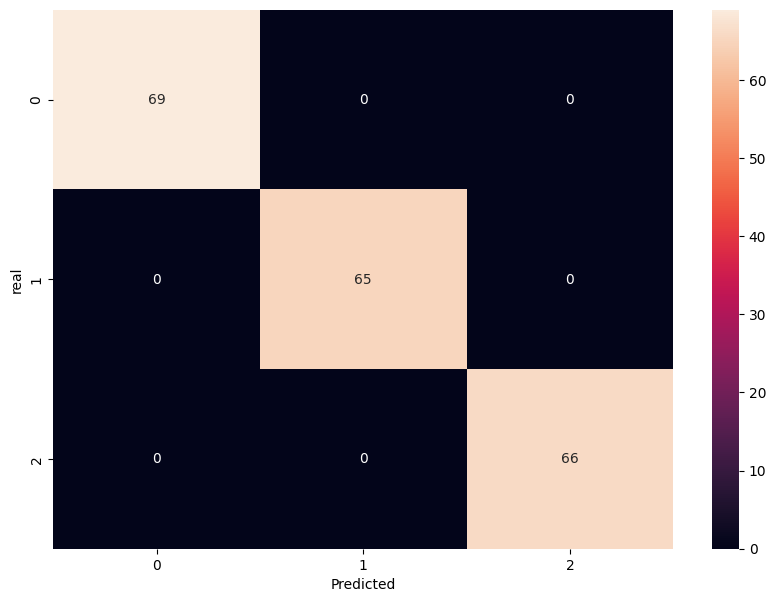

In [20]:
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [21]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  100.0 %,  200.0 correct detections
Inaccuracy:  0.0 %,  0.0 Incorrect detections


**Predctive System**

In [22]:
df.iloc[23]

Age                        29
Gender                      2
AirPollution                6
Alcoholuse                  7
DustAllergy                 7
OccuPationalHazards         7
GeneticRisk                 7
chronicLungDisease          6
BalancedDiet                7
Obesity                     7
Smoking                     7
PassiveSmoker               7
ChestPain                   7
CoughingofBlood             7
Fatigue                     2
WeightLoss                  7
ShortnessofBreath           6
Wheezing                    7
SwallowingDifficulty        6
ClubbingofFingerNails       7
FrequentCold                2
DryCough                    3
Snoring                     1
Level                    High
Name: 23, dtype: object

In [23]:
input_data = (35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
#print(prediction)

print("Lung cancer detected, level: ", prediction)

Lung cancer detected, level:  ['High']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Saving the Model**

In [24]:
import pickle

In [25]:
filename = 'Lung_cancer_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Loading Model**

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))

In [27]:
for columns in df.columns:
  print(columns)

Age
Gender
AirPollution
Alcoholuse
DustAllergy
OccuPationalHazards
GeneticRisk
chronicLungDisease
BalancedDiet
Obesity
Smoking
PassiveSmoker
ChestPain
CoughingofBlood
Fatigue
WeightLoss
ShortnessofBreath
Wheezing
SwallowingDifficulty
ClubbingofFingerNails
FrequentCold
DryCough
Snoring
Level
